In [285]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import  font_manager

In [280]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [286]:
plt.rcParams.update({'font.size': 22})
ticks_font = font_manager.FontProperties(family='Helvetica', style='normal',
    size=22, weight='normal', stretch='normal')

# avoided crossing

In [383]:
def avoided_crossing_lower(x, wq_max, wc, g,phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
Views
Agilent Network Analyzer - S21
Agilent Network Analyzer - S21_N
Agilent Network Analyzer - S21_t0dt
Time stamp


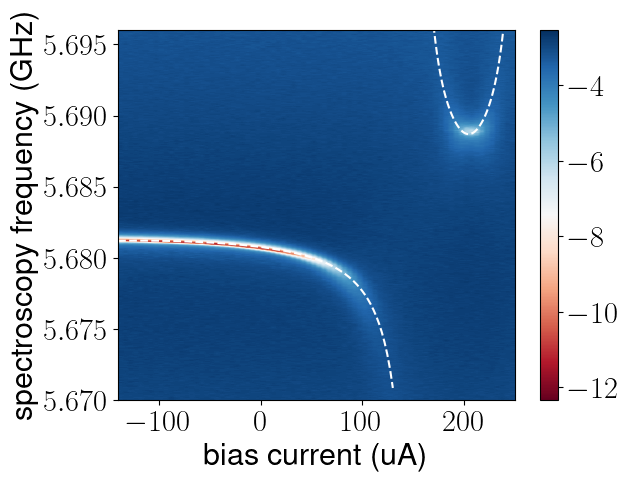

In [405]:
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0224\\'
f_name = 'diss08_07A_FluxSweep_4.hdf5'

f = h5py.File(datapath + f_name,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Traces'].keys():
    print(key)

    
s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]
currents = np.linspace(-200,550,151)
#guess_current = np.linspace(f['Data']['Data'])
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_logmag = 10 * np.log(np.abs(s21_complex))
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

# slicing
freq_min = np.argmin(abs(freqs - 5.67e9))
current_min = np.argmin(abs(currents - -140))
current_max = np.argmin(abs(currents - 250))

plt.imshow(s21_logmag[freq_min:,current_min:current_max], aspect='auto',origin='lower',extent=(currents[current_min], currents[current_max], freqs[freq_min]/1e9, freqs[-1]/1e9), interpolation=None, cmap='RdBu')
plt.xlabel('bias current (uA)')
plt.ylabel('spectroscopy frequency (GHz)')

# add the fit

plt.colorbar()
current_lower = np.argmin(abs(currents - 130)) # uA
current_upper = np.argmin(abs(currents - 170))
x1 =  np.linspace(currents[current_min], currents[current_lower],100)
x2 =  np.linspace(currents[current_upper], currents[current_max],100)
popt = [11.074339151454915, 5.68276, 0.1114295, -0.58231, 0.069572]

plt.plot(x1,avoided_crossing_lower(x1/650,*popt),'w--')
plt.plot(x2,avoided_crossing_upper(x2/650,*popt),'w--')
plt.ylim(5.67, freqs[-1]/1e9)
plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\avoided_crossing.png', bbox_inches = 'tight')

In [400]:
avoided_crossing_upper(x2/1e3,*popt)


array([8.04595048, 8.02558446, 8.00514474, 7.98463094, 7.96404272,
       7.94337969, 7.92264149, 7.90182775, 7.88093809, 7.85997212,
       7.83892947, 7.81780973, 7.79661253, 7.77533747, 7.75398415,
       7.73255216, 7.71104111, 7.68945058, 7.66778017, 7.64602946,
       7.62419804, 7.60228549, 7.58029138, 7.55821529, 7.53605681,
       7.51381549, 7.49149092, 7.46908266, 7.44659028, 7.42401335,
       7.40135144, 7.37860411, 7.35577094, 7.3328515 , 7.30984535,
       7.28675208, 7.26357125, 7.24030245, 7.21694527, 7.1934993 ,
       7.16996414, 7.14633939, 7.12262467, 7.09881961, 7.07492385,
       7.05093704, 7.02685885, 7.00268899, 6.97842716, 6.9540731 ,
       6.92962658, 6.9050874 , 6.8804554 , 6.85573046, 6.83091252,
       6.80600155, 6.78099761, 6.75590081, 6.73071136, 6.70542956,
       6.68005581, 6.65459063, 6.62903471, 6.60338887, 6.57765414,
       6.55183176, 6.52592324, 6.49993037, 6.47385529, 6.44770057,
       6.42146925, 6.39516494, 6.36879194, 6.34235535, 6.31586

# the smoking-gun signature plot

In [231]:
punchoutLogFile = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0222\\diss08_07A_FFL spectroscopy_VNApowerSweep_3.hdf5'
driveLogFile = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0222\\diss08_07A_FFL spectroscopy_VNApowerSweep.hdf5'

## punchout

Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
Views
Agilent Network Analyzer - S21
Agilent Network Analyzer - S21_N
Agilent Network Analyzer - S21_t0dt
Time stamp


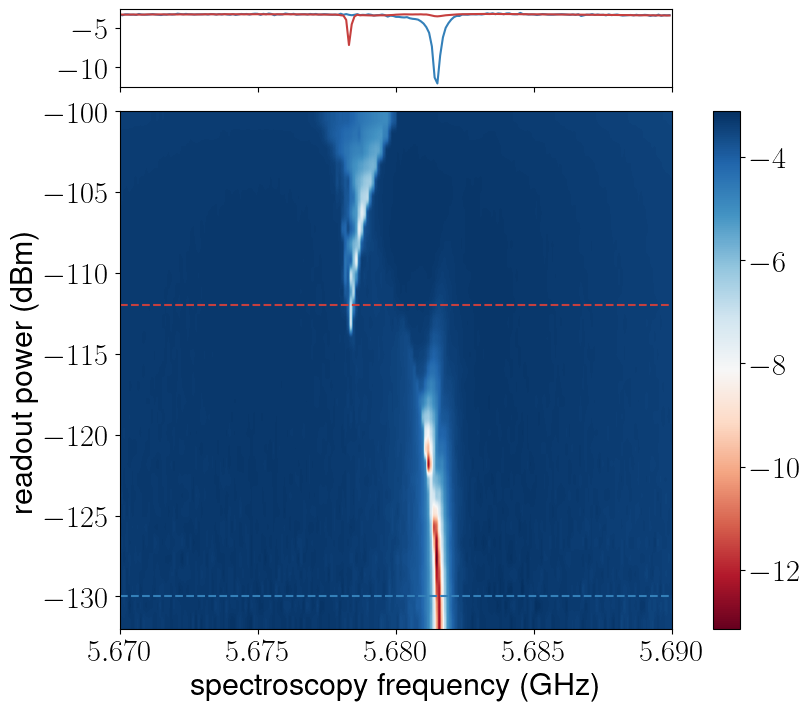

In [288]:
f = h5py.File(punchoutLogFile,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Traces'].keys():
    print(key)

    
s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]
powers = np.linspace(-27,5,33) - 35 - 70 # double check this value
#guess_current = np.linspace(f['Data']['Data'])
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_logmag = 10 * np.log(np.abs(s21_complex))
s21_logma_t = np.transpose(s21_logmag)
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

# slicing
freq_mmax = np.argmin(abs(freqs - 5.690e9))
freq_min = np.argmin(abs(freqs - 5.67e9))
# line cuts
line1 = -112
line2 = -130
index1 = np.argmin(abs(powers-line1))
index2 = np.argmin(abs(powers-line2))
fig, axes  = plt.subplots(2, 2, sharex='col',figsize=(8,7), gridspec_kw={'height_ratios':[1.5,10],'width_ratios':[100,5]},constrained_layout = True)
axes[0,1].remove()
axes[0,0].plot(freqs[freq_min:freq_mmax]/1e9, s21_logmag[freq_min:freq_mmax,index2],'-',color='#3480B9')
axes[0,0].plot(freqs[freq_min:freq_mmax]/1e9, s21_logmag[freq_min:freq_mmax,index1],'-',color='#C63F3E')
im = axes[1,0].imshow(s21_logma_t[:,freq_min:freq_mmax], aspect='auto',origin='lower',extent=(freqs[freq_min]/1e9, freqs[freq_mmax]/1e9,powers[0], powers[-1]),
            interpolation=None, cmap='RdBu')
axes[1,0].axhline(line1, ls='--',color='#C63F3E')
axes[1,0].axhline(line2, ls='--',color='#3480B9')
axes[1,0].set_ylabel('readout power (dBm)')
axes[1,0].set_xlabel('spectroscopy frequency (GHz)')
plt.colorbar(im, cax=axes[1,1])

plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\punchout.png')

## drive on

Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
Views
Agilent Network Analyzer - S21
Agilent Network Analyzer - S21_N
Agilent Network Analyzer - S21_t0dt
Time stamp


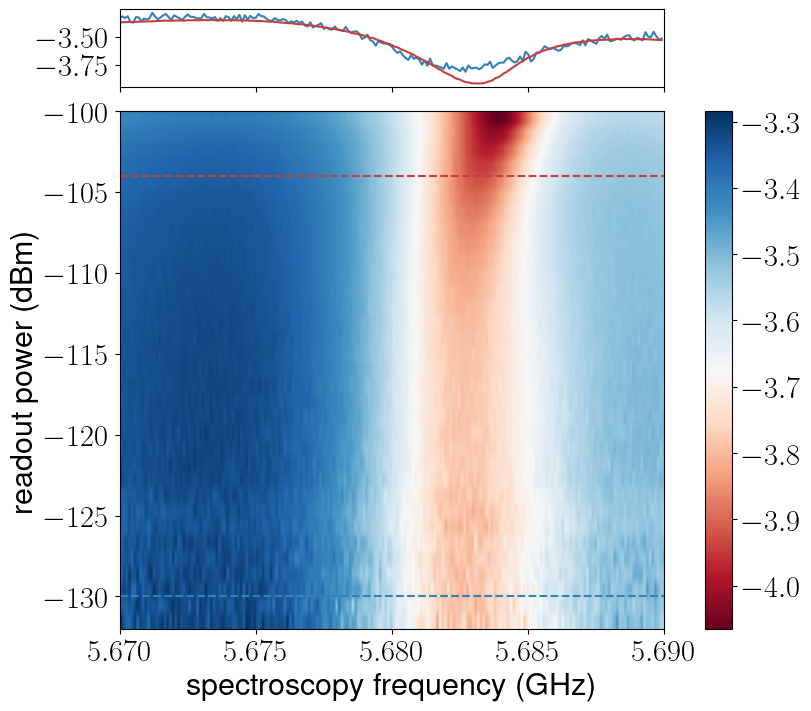

In [291]:
f = h5py.File(driveLogFile,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Traces'].keys():
    print(key)

    
s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]
powers = np.linspace(-27,5,33) - 35 - 70 # double check this value
#guess_current = np.linspace(f['Data']['Data'])
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_logmag = 10 * np.log(np.abs(s21_complex))
s21_logma_t = np.transpose(s21_logmag)
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

# slicing
freq_mmax = np.argmin(abs(freqs - 5.690e9))
freq_min = np.argmin(abs(freqs - 5.67e9))
# line cuts
line1 = -104
line2 = -130
index1 = np.argmin(abs(powers-line1))
index2 = np.argmin(abs(powers-line2))
fig, axes  = plt.subplots(2, 2, sharex='col',figsize=(8,7), gridspec_kw={'height_ratios':[1.5,10],'width_ratios':[100,5]},constrained_layout = True)
axes[0,1].remove()
axes[0,0].plot(freqs[freq_min:freq_mmax]/1e9, s21_logmag[freq_min:freq_mmax,index2],'-',color='#3480B9')
axes[0,0].plot(freqs[freq_min:freq_mmax]/1e9, s21_logmag[freq_min:freq_mmax,index1],'-',color='#C63F3E')
im = axes[1,0].imshow(s21_logma_t[:,freq_min:freq_mmax], aspect='auto',origin='lower',extent=(freqs[freq_min]/1e9, freqs[freq_mmax]/1e9,powers[0], powers[-1]),
            interpolation=None, cmap='RdBu')
axes[1,0].axhline(line1, ls='--',color='#C63F3E')
axes[1,0].axhline(line2, ls='--',color='#3480B9')
axes[1,0].set_ylabel('readout power (dBm)')
axes[1,0].set_xlabel('spectroscopy frequency (GHz)')
plt.colorbar(im, cax=axes[1,1])

plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\qin_drive_on.png')

In [292]:
f.close()

In [300]:

sys.path.append("E:\\Program Files\\Keysight\\Labber\\Script")

import Labber

# two tone & FFL spectroscopy

In [354]:
# data sets:
fffl1 = r'G:\\Shared drives\\Labber\\Data\\2023\\03\\Data_0302\\diss08_07A_FFLspec_powersweeps_18.hdf5'
f2tone1 = r'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0227\\diss08_07A_direct2tone_fluxSweep_3.hdf5'
f2tone2 = r'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0227\\diss08_07A_direct2tone_sweepFlux.hdf5'
fffl2 = r'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0227\\diss08_07A_FFLspec_fluxSweep.hdf5'

In [342]:
f.close()

In [343]:
f = h5py.File(fffl1,'r')
currents = np.linspace(-190, -70, 7)
spec_freqs = np.linspace(6e9, 7e9, 51)

s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]

s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_logmag = 10 * np.log(np.abs(s21_complex))
s21_logma_t = np.transpose(s21_logmag)
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

# slicing given a frequency and a span
def slice_by_center_freq_and_span(freqs, f_c, span):
    f1 = f_c - span
    f2 = f_c + span
    index1 = np.argmin(abs(freqs - f1))
    index2 = np.argmin(abs(freqs - f2))
    return index1, index2



fc = 5.68127 GHz
fc = 5.68127 GHz
fc = 5.68125 GHz
fc = 5.68123 GHz
fc = 5.68119 GHz
fc = 5.68116 GHz
fc = 5.68110 GHz


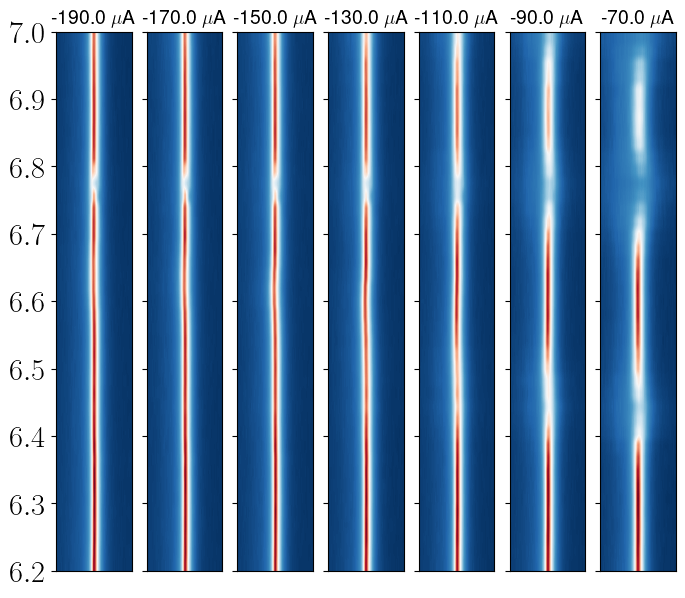

In [346]:
# heatplot subplots
fig, axes = plt.subplots(1, 7, figsize=(8, 7),sharey=True)
for i in range(7):
    data = s21_logma_t[51*i:51*(i+1),:]
    avg_s21 = np.average(data,axis=0)
    fc = freqs[np.argmin(avg_s21)]
    print(f'fc = {fc/1e9:.5f} GHz')
    span = 1.9e6
    fmin = np.argmin(abs(spec_freqs - 6.2e9))
    f1, f2 = slice_by_center_freq_and_span(freqs,fc, span)
    im = axes[i].imshow(data[fmin:,f1:f2], aspect='auto',origin='lower',extent=(freqs[f1]/1e9, freqs[f2]/1e9,spec_freqs[fmin]/1e9, spec_freqs[-1]/1e9),
            interpolation=None, cmap='RdBu')
    axes[i].set_xticks([])
    axes[i].set_title(f'{currents[i]} '+r'$\mu$A',fontsize=14)
plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\ffl_spec1.png')

In [358]:
f.close()

In [477]:
f = h5py.File(fffl2,'r')
currents = np.linspace(-180, -100, 5)
spec_freqs = np.linspace(6e9, 7e9, 51)

s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]

s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_logmag = 10 * np.log(np.abs(s21_complex))
s21_logma_t = np.transpose(s21_logmag)
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

# slicing given a frequency and a span
def slice_by_center_freq_and_span(freqs, f_c, span):
    f1 = f_c - span
    f2 = f_c + span
    index1 = np.argmin(abs(freqs - f1))
    index2 = np.argmin(abs(freqs - f2))
    return index1, index2



fc = 5.68142 GHz
fc = 5.68139 GHz
fc = 5.68139 GHz
fc = 5.68136 GHz
fc = 5.68130 GHz


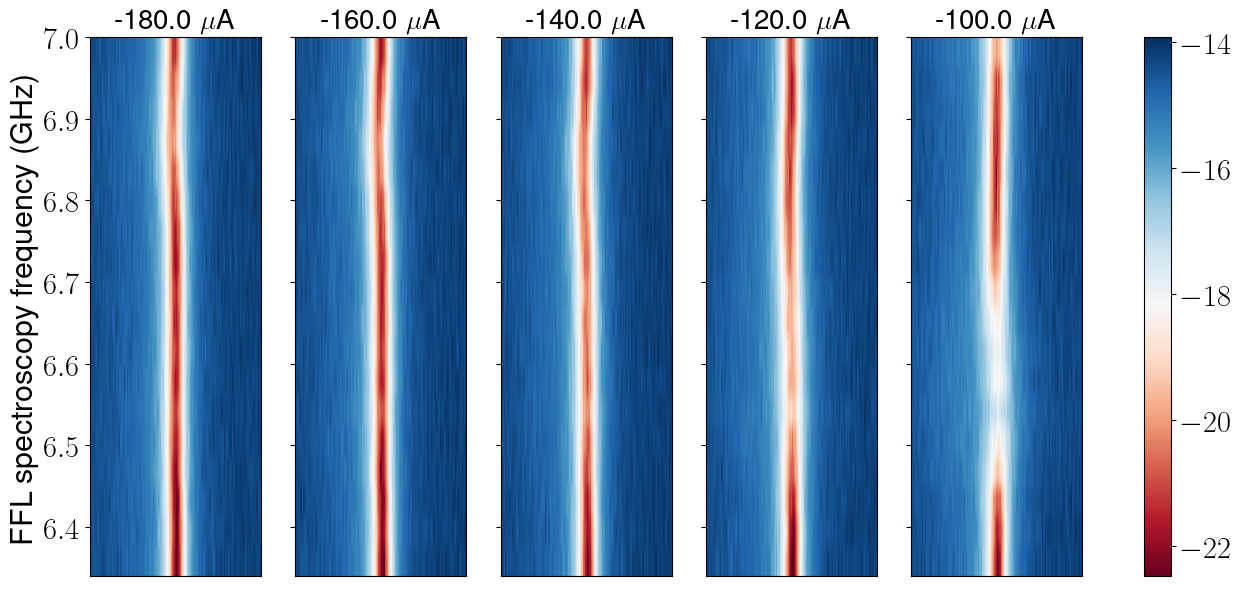

In [481]:
# heatplot subplots
fig, axes = plt.subplots(1, 5, figsize=(16, 7),sharey=True)
for i in range(5):
    data = s21_logma_t[51*i:51*(i+1),:]
    avg_s21 = np.average(data,axis=0)
    fc = freqs[np.argmin(avg_s21)]
    print(f'fc = {fc/1e9:.5f} GHz')
    span = 1.9e6
    fmin = np.argmin(abs(spec_freqs - 6.35e9))
    fmax = np.argmin(abs(spec_freqs - 6.7e9))
    f1, f2 = slice_by_center_freq_and_span(freqs,fc, span)
    im = axes[i].imshow(data[fmin:fmax,f1:f2], aspect='auto',origin='lower',extent=(freqs[f1]/1e9, freqs[f2]/1e9,spec_freqs[fmin]/1e9, spec_freqs[-1]/1e9),
            interpolation=None, cmap='RdBu')
    axes[i].set_xticks([])
    axes[i].set_title(f'{currents[i]} '+r'$\mu$A', fontsize = 20)
axes[0].set_ylabel('FFL spectroscopy frequency (GHz)')
cbar = fig.colorbar(im, ax=axes.ravel().tolist())
plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\ffl_spec2.png')

## two tone

In [376]:
f.close()

In [377]:
f = h5py.File(f2tone2,'r')
currents = np.linspace(-100, -180, 5)
spec_freqs = np.linspace(11.681e9, 12.681e9, 51)

s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]

s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_logmag = 10 * np.log(np.abs(s21_complex))
s21_logma_t = np.transpose(s21_logmag)
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

# slicing given a frequency and a span
def slice_by_center_freq_and_span(freqs, f_c, span):
    f1 = f_c - span
    f2 = f_c + span
    index1 = np.argmin(abs(freqs - f1))
    index2 = np.argmin(abs(freqs - f2))
    return index1, index2



fc = 5.68135 GHz
fc = 5.68142 GHz
fc = 5.68143 GHz
fc = 5.68145 GHz
fc = 5.68146 GHz


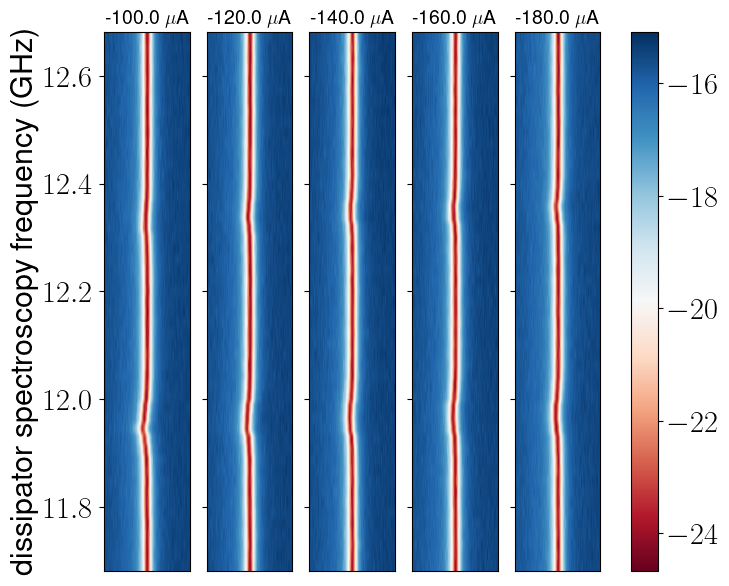

In [379]:
# heatplot subplots
fig, axes = plt.subplots(1, 5, figsize=(8, 7),sharey=True)
for i in range(5):
    data = s21_logma_t[51*i:51*(i+1),:]
    avg_s21 = np.average(data,axis=0)
    fc = freqs[np.argmin(avg_s21)]
    print(f'fc = {fc/1e9:.5f} GHz')
    span = 1.9e6
    fmin = 0
    f1, f2 = slice_by_center_freq_and_span(freqs,fc, span)
    im = axes[i].imshow(data[fmin:,f1:f2], aspect='auto',origin='lower',extent=(freqs[f1]/1e9, freqs[f2]/1e9,spec_freqs[fmin]/1e9, spec_freqs[-1]/1e9),
            interpolation=None, cmap='RdBu')
    axes[i].set_xticks([])
    axes[i].set_title(f'{currents[i]} '+r'$\mu$A', fontsize = 14)
axes[0].set_ylabel('dissipator spectroscopy frequency (GHz)')
cbar = fig.colorbar(im, ax=axes.ravel().tolist())
plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\twotone_spec2.png')

# ring down

In [45]:
import scipy

In [42]:
from fitTools import AnalysisFunctions as af


In [493]:
dataDir = 'G:\\Shared drives\\CavityCooling\\data\\diss08_07A\\20230302\\ringdown'
filename = 'ringdown_navg=5000_repeat=0_test.h5'


In [494]:
f =  h5py.File(f'{dataDir}\\{filename}', 'r') 
print(f.keys())
key = list(f.keys())[0]
print(key)



<KeysViewHDF5 ['sweep_ffl_amp_22:28:04']>
sweep_ffl_amp_22:28:04


In [496]:
num_of_entries = len(f[key].keys())

In [497]:
f[key].keys()

<KeysViewHDF5 ['ffl_amp = 0.1', 'ffl_amp = 0.15', 'ffl_amp = 0.2', 'ffl_amp = 0.25', 'ffl_amp = 0.3', 'ffl_off']>

In [498]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def decay(x,amp,tau,offset):
    return amp*np.exp(-x/tau)+offset

<>:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\2500414310.py:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i is not 5:


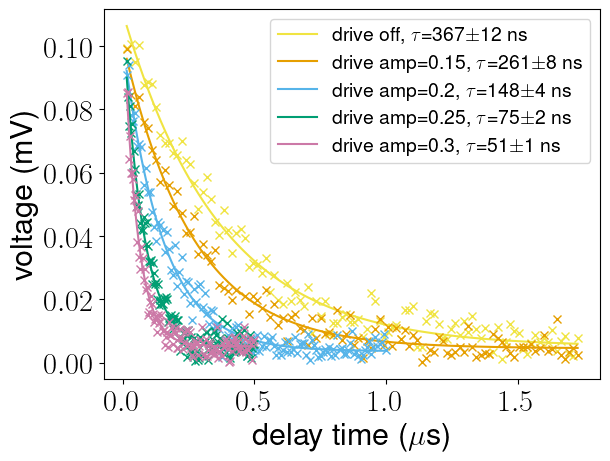

In [507]:
mag_array =[]
time_array = []
t1 = np.zeros((num_of_entries, ))
t1_err = np.zeros((num_of_entries, ))
cmap =['#000000',
        '#e69f00',
        '#56b4e9',
        '#009e73',
        '#cc79a7',
        '#f0e442',
        '#0072b2',
        '#d55e00',
        ]
for i in [5,1,2,3,4]:
    entry0 = list(f[key].keys())[i]
    time = np.array(f[key][entry0]['t'])
    data = np.array(f[key][entry0]['I']) + 1j * np.array(f[key][entry0]['Q'])
    mag = abs(data) * 1e3
    mag_array.append(mag)
    time_array.append(time)
    tau = 0.2
    amp = abs(mag[0] - mag[-1])
    offset = 0

    p0 = [amp,tau,offset]
    fitFunction = decay
    fitted_pars, covar = scipy.optimize.curve_fit(fitFunction, time, mag,p0=p0,method='trf',xtol=1e-12,maxfev=40e3)
    error = np.sqrt(abs(np.diag(covar)))
    t1[i] = fitted_pars[1]
    t1_err[i] = error[1]
    if time[-1] > 1.75:
        cut = np.argmin(abs(time - 1.75))
        time = time[:cut]
        mag = mag[:cut]
    # 
    plt.plot(time, mag ,'x',color = cmap[i])
    if i is not 5:
        label='drive amp='+entry0.split(' = ')[1] + ', '
    else:
        label = 'drive off, '
    plt.plot(time, decay(time,fitted_pars[0], fitted_pars[1], fitted_pars[2]),'-',color =cmap[i],label=label+r'$\tau$'+'={%d}'%(fitted_pars[1]*1e3)+r'$\pm$'+'{%d} ns'%(t1_err[i]*1e3))
    plt.legend(fontsize=14)
    plt.xlabel('delay time ('+r'$\mu$'+'s)')
    plt.ylabel('voltage (mV)')
    plt.savefig(f'G:\\Shared drives\\CavityCooling\\march_meeting_2023\\ringdown_old_{i}.png',bbox_inches = 'tight')


In [2]:
import os
os.getcwd()

'c:\\Users\\LFL\\Cavity-Cooling'

In [198]:
f.close()

## sweep powers, readout atten = 23 dB

In [121]:
dataDir = 'G:\\Shared drives\\CavityCooling\\data\\diss08_07A\\20230303\\ringdown'
filename = 'ringdown_sweepPowers_DA=23dB_rrLen=500clks_navg=5000_2.h5'

f =  h5py.File(f'{dataDir}\\{filename}', 'r') 
print(f.keys())
key = list(f.keys())[0]
print(key)

<KeysViewHDF5 ['sweep_ffl_amp_02:01:05']>
sweep_ffl_amp_02:01:05


In [187]:
num_of_entries = len(f[key].keys())
num_of_entries

ffl_scales = np.round(np.linspace(0.2,1.0,11),2)
rr_scales = np.linspace(0.2,1,5)

In [126]:
import seaborn as sns

In [129]:
f[key].keys()

<KeysViewHDF5 ['ro_scale = 0.2, ffl_off', 'ro_scale = 0.2, ffl_scale = 0.2', 'ro_scale = 0.2, ffl_scale = 0.28', 'ro_scale = 0.2, ffl_scale = 0.36', 'ro_scale = 0.2, ffl_scale = 0.44', 'ro_scale = 0.2, ffl_scale = 0.52', 'ro_scale = 0.2, ffl_scale = 0.6', 'ro_scale = 0.2, ffl_scale = 0.68', 'ro_scale = 0.2, ffl_scale = 0.76', 'ro_scale = 0.2, ffl_scale = 0.84', 'ro_scale = 0.2, ffl_scale = 0.92', 'ro_scale = 0.2, ffl_scale = 1.0', 'ro_scale = 0.4, ffl_off', 'ro_scale = 0.4, ffl_scale = 0.2', 'ro_scale = 0.4, ffl_scale = 0.28', 'ro_scale = 0.4, ffl_scale = 0.36', 'ro_scale = 0.4, ffl_scale = 0.44', 'ro_scale = 0.4, ffl_scale = 0.52', 'ro_scale = 0.4, ffl_scale = 0.6', 'ro_scale = 0.4, ffl_scale = 0.68', 'ro_scale = 0.4, ffl_scale = 0.76', 'ro_scale = 0.4, ffl_scale = 0.84', 'ro_scale = 0.4, ffl_scale = 0.92', 'ro_scale = 0.4, ffl_scale = 1.0', 'ro_scale = 0.6000000000000001, ffl_off', 'ro_scale = 0.6000000000000001, ffl_scale = 0.2', 'ro_scale = 0.6000000000000001, ffl_scale = 0.28', 'r

In [184]:
mag_array =[]
time_array = []
t1 = np.zeros((12, 5))
t1_err = np.zeros((12, 5))
fitted_pars_array = np.zeros((60,3))
for i in range(5):
    for j in range(12):
        entry0 = list(f[key].keys())[i*12 + j]
        time = np.array(f[key][entry0]['t'])
        data = np.array(f[key][entry0]['I']) + 1j * np.array(f[key][entry0]['Q'])
        mag = abs(data) * 1e3
        mag_array.append(mag)
        time_array.append(time)
        tau = 0.2
        amp = abs(mag[0] - mag[-1])
        offset = 0

        p0 = [amp,tau,offset]
        fitFunction = decay
        fitted_pars, covar = scipy.optimize.curve_fit(fitFunction, time, mag,p0=p0,method='trf',xtol=1e-12,maxfev=40e3)
        error = np.sqrt(abs(np.diag(covar)))
        t1[j,i] = fitted_pars[1]
        t1_err[j,i] = error[1]
        fitted_pars_array[i*12+j,:] = fitted_pars
    



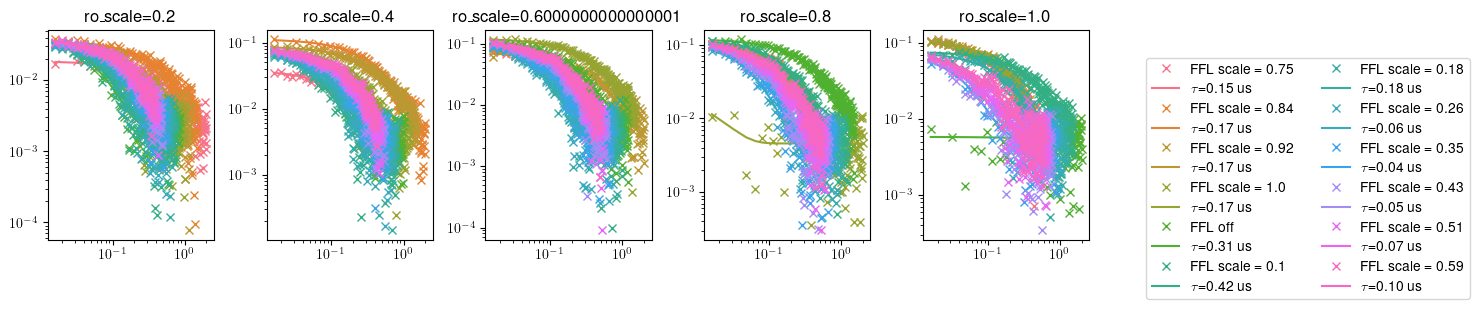

In [185]:
cmap =['#000000',
        '#e69f00',
        '#56b4e9',
        '#009e73',
        '#cc79a7',
        '#f0e442',
        '#0072b2',
        '#d55e00',
        ]
clrs = sns.color_palette('husl', n_colors=12)  
fig, axes = plt.subplots(1,5, figsize=(15,3))
legs = []
for i in range(5):
    for j in range(12):
        time = time_array[i*12 + j]
        mag = mag_array[i*12 + j]
        axes[i].plot(time, mag ,'x',color = clrs[j],label=list(f[key].keys())[i*12 + j].split(',')[1].replace('_',' ').replace('ffl','FFL').replace('amp','scale'))
        axes[i].plot(time, decay(time,fitted_pars_array[i*12 + j,0], fitted_pars_array[i*12 + j,1], fitted_pars_array[i*12 + j,2]),'-',color =clrs[j],label=r'$\tau$={%.2f} us'%(fitted_pars_array[i*12 + j,1]))
        axes[i].set_title(f'ro_scale={rr_scales[i]}')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
axes[i].legend(ncol=2, bbox_to_anchor=(1.3, 0.9), bbox_transform=axes[i].transAxes)
plt.tight_layout()



need to access low power regime <0.5 in finer steps
need longer tmax for high drive power

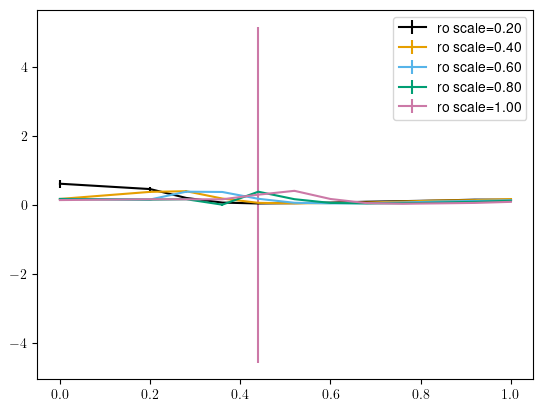

In [188]:
for i in range(5):
    plt.errorbar([0]+list(ffl_scales),t1[:,i],yerr=t1_err[:,i]*2,label=f'ro scale={rr_scales[i]:.2f}',color=cmap[i])
plt.legend()

In [166]:
f.close()

## sweep powers, readout atten = 18 dB

In [167]:
dataDir = 'G:\\Shared drives\\CavityCooling\\data\\diss08_07A\\20230303\\ringdown'
filename = 'ringdown_sweepPowers_DA=18dB_rrLen=500clks_navg=5000_2.h5'

f =  h5py.File(f'{dataDir}\\{filename}', 'r') 
print(f.keys())
key = list(f.keys())[0]
print(key)

<KeysViewHDF5 ['sweep_ffl_amp_12:49:42']>
sweep_ffl_amp_12:49:42


In [169]:
num_of_entries = len(f[key].keys())
print(num_of_entries)

ffl_scales = np.round(np.linspace(0.1,1.0,12),2)
rr_scales = np.linspace(0.2,1,5)

65


In [176]:
mag_array_18 =[]
time_array_18 = []
t1_18 = np.zeros((13, 5))
t1_err_18 = np.zeros((13, 5))
fitted_pars_array_18 = np.zeros((65,3))
for i in range(5):
    for j in range(13):
        entry0 = list(f[key].keys())[i*13 + j]
        time = np.array(f[key][entry0]['t'])
        data = np.array(f[key][entry0]['I']) + 1j * np.array(f[key][entry0]['Q'])
        mag = abs(data) * 1e3
        mag_array_18.append(mag)
        time_array_18.append(time)
        tau = 0.1
        amp = abs(mag[0] - mag[-1])
        offset = 0

        p0 = [amp,tau,offset]
        fitFunction = decay
        fitted_pars, covar = scipy.optimize.curve_fit(fitFunction, time, mag,p0=p0,method='trf',xtol=1e-12,maxfev=40e3)
        error = np.sqrt(abs(np.diag(covar)))
        t1_18[j,i] = fitted_pars[1]
        t1_err_18[j,i] = error[1]
        fitted_pars_array_18[i*12+j,:] = fitted_pars

C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\4117498596.py:7: RuntimeWarning: overflow encountered in exp
  return amp*np.exp(-x/tau)+offset


C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\4117498596.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return amp*np.exp(-x/tau)+offset
C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\4117498596.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return amp*np.exp(-x/tau)+offset
C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\4117498596.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return amp*np.exp(-x/tau)+offset
C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\4117498596.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return amp*np.exp(-x/tau)+offset


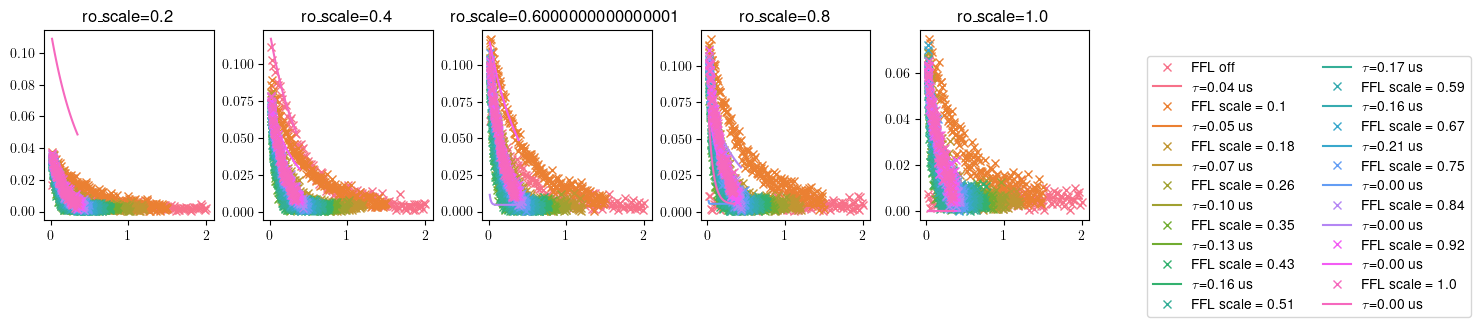

In [181]:
cmap =['#000000',
        '#e69f00',
        '#56b4e9',
        '#009e73',
        '#cc79a7',
        '#f0e442',
        '#0072b2',
        '#d55e00',
        ]
clrs = sns.color_palette('husl', n_colors=13)  
fig, axes = plt.subplots(1,5, figsize=(15,3))
legs = []
nf = 13
for i in range(5):
    for j in range(nf):
        time = time_array_18[i*nf + j]
        mag = mag_array_18[i*nf + j]
        axes[i].plot(time, mag ,'x',color = clrs[j],label=list(f[key].keys())[i*nf + j].split(',')[1].replace('_',' ').replace('ffl','FFL').replace('amp','scale'))
        axes[i].plot(time, decay(time,fitted_pars_array_18[i*nf + j,0], fitted_pars_array_18[i*nf + j,1], fitted_pars_array_18[i*nf + j,2]),'-',color =clrs[j],label=r'$\tau$={%.2f} us'%(fitted_pars_array_18[i*nf + j,1]))
        axes[i].set_title(f'ro_scale={rr_scales[i]}')
    # axes[i].set_xscale('log')
    # axes[i].set_yscale('log')
axes[i].legend(ncol=2, bbox_to_anchor=(1.3, 0.9), bbox_transform=axes[i].transAxes)
plt.tight_layout()



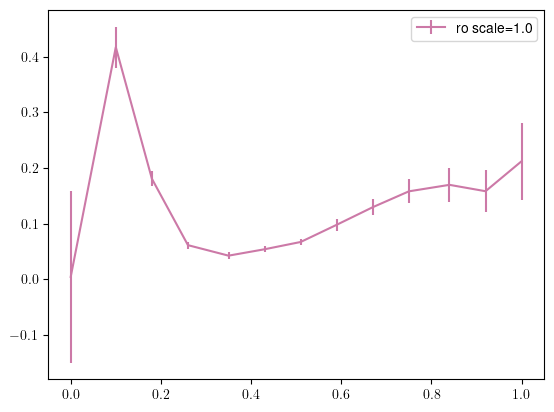

In [180]:
I = 1
plt.errorbar([0]+list(ffl_scales),t1_18[:,i],yerr=t1_err_18[:,i]*2,label=f'ro scale={rr_scales[i]}',color=cmap[i])
plt.legend()

## sweep powers rr atten = 23, extra 6 dB due to extra spliters for remote setup

In [208]:
f.close()

In [216]:
dataDir = 'G:\\Shared drives\\CavityCooling\\data\\diss08_07A\\20230303\\ringdown'
filename = 'ringdown_sweepPowers_DA=23dB_rrLen=500clks_navg=2000_4.h5'

f =  h5py.File(f'{dataDir}\\{filename}', 'r') 
print(f.keys())
key = list(f.keys())[0]
print(key)

num_of_entries = len(f[key].keys())
print(num_of_entries)

ffl_scales = np.round(np.linspace(0.1,1.0,10),2)
rr_scales = np.round(np.linspace(0.1,1,10),2)

num_of_entries = len(f[key].keys())
print(num_of_entries)


mag_array_23 =[]
time_array_23 = []
t1_23 = np.zeros((10, 11))
t1_err_23 = np.zeros((10, 11))
fitted_pars_array_23 = np.zeros((110,3))
for i in range(10):
    for j in range(11):
        entry0 = list(f[key].keys())[i*11 + j]
        time = np.array(f[key][entry0]['t'])
        data = np.array(f[key][entry0]['I']) + 1j * np.array(f[key][entry0]['Q'])
        mag = abs(data) * 1e3
        mag_array_23.append(mag)
        time_array_23.append(time)
        tau = 0.1
        amp = abs(mag[0] - mag[-1])
        offset = 0

        p0 = [amp,tau,offset]
        fitFunction = decay
        fitted_pars, covar = scipy.optimize.curve_fit(fitFunction, time, mag,p0=p0,method='trf',xtol=1e-12,maxfev=40e3)
        error = np.sqrt(abs(np.diag(covar)))
        t1_23[i,j] = fitted_pars[1]
        t1_err_23[i,j] = error[1]
        fitted_pars_array_23[i*11+j,:] = fitted_pars


<KeysViewHDF5 ['sweep_ffl_amp_20:40:15']>
sweep_ffl_amp_20:40:15
110
110


C:\Users\LFL\AppData\Local\Temp\ipykernel_13188\4117498596.py:7: RuntimeWarning: overflow encountered in exp
  return amp*np.exp(-x/tau)+offset


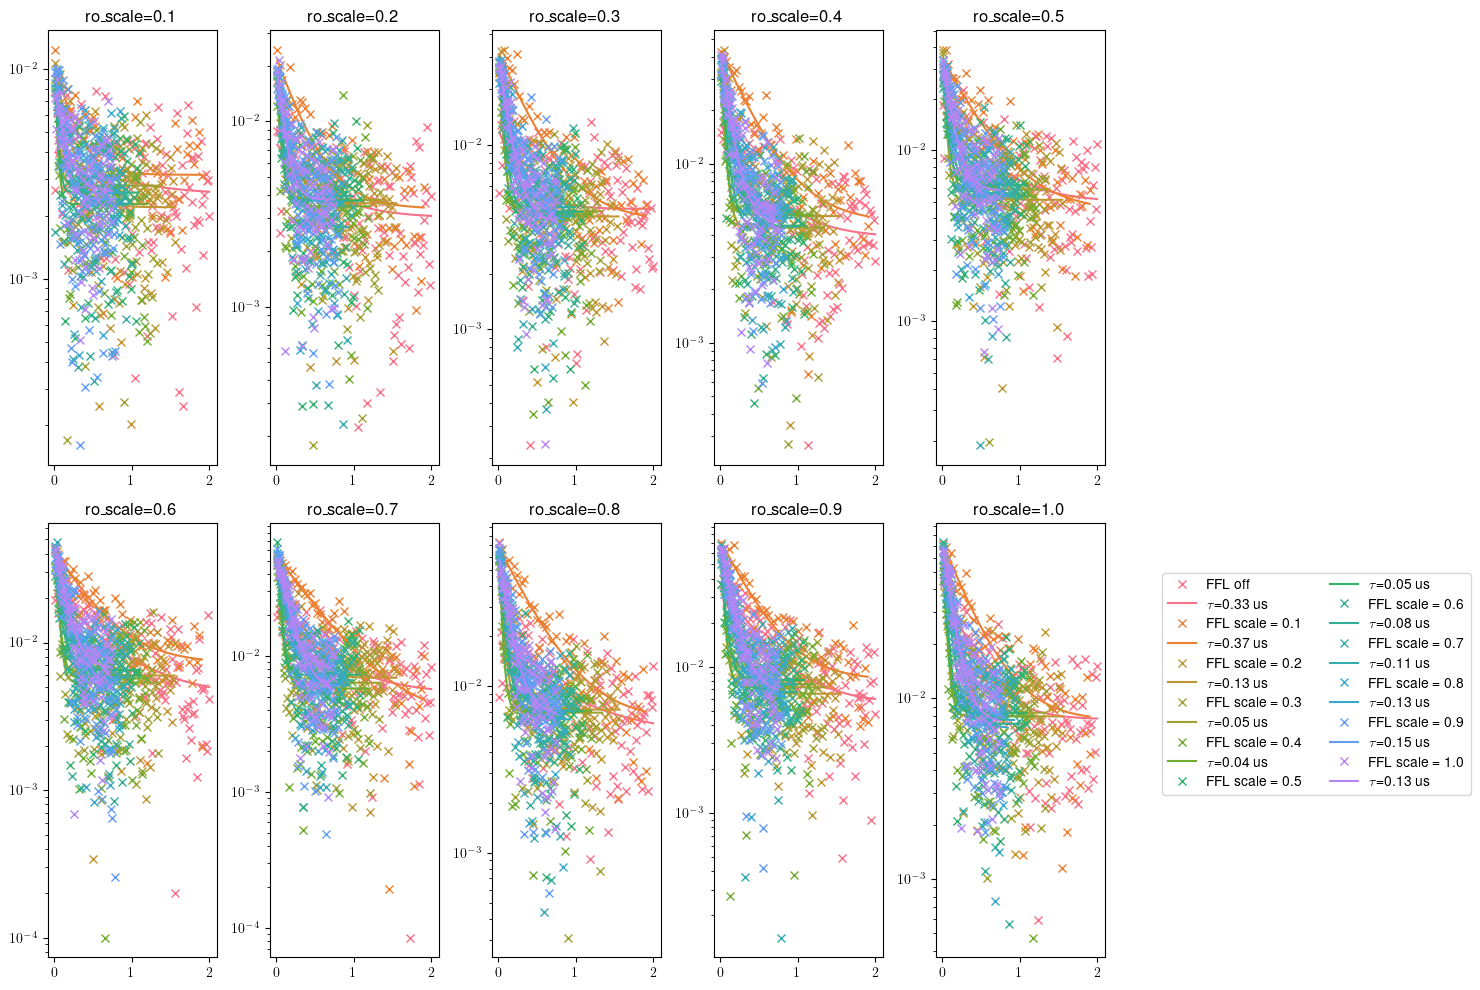

In [217]:
cmap =['#000000',
        '#e69f00',
        '#56b4e9',
        '#009e73',
        '#cc79a7',
        '#f0e442',
        '#0072b2',
        '#d55e00',
        ]
clrs = sns.color_palette('husl', n_colors=13)  
fig, axes = plt.subplots(2,5, figsize=(15,10))
axes = axes.flatten()
legs = []
nf = 11
for i in range(10):
    for j in range(nf):
        time = time_array_23[i*nf + j]
        mag = mag_array_23[i*nf + j]
        axes[i].plot(time, mag ,'x',color = clrs[j],label=list(f[key].keys())[i*nf + j].split(',')[1].replace('_',' ').replace('ffl','FFL').replace('amp','scale'))
        axes[i].plot(time, decay(time,fitted_pars_array_23[i*nf + j,0], fitted_pars_array_23[i*nf + j,1], fitted_pars_array_23[i*nf + j,2]),'-',color =clrs[j],label=r'$\tau$={%.2f} us'%(fitted_pars_array_23[i*nf + j,1]))
    axes[i].set_title(f'ro_scale={rr_scales[i]}')
    # axes[i].set_xscale('log')
    axes[i].set_yscale('log')
axes[i].legend(ncol=2, bbox_to_anchor=(1.3, 0.9), bbox_transform=axes[i].transAxes)
plt.tight_layout()

In [221]:
len(cmap)

8

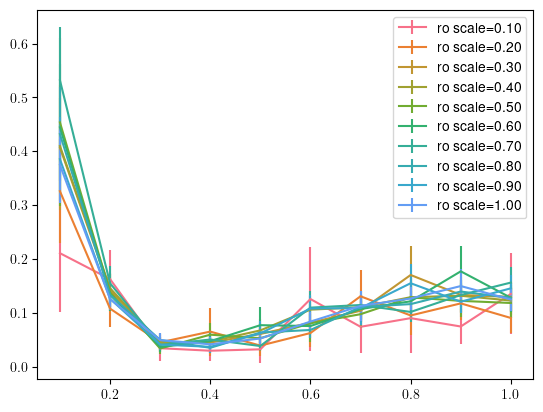

In [222]:
for i in range(10):
    plt.errorbar(list(ffl_scales),t1_23[i,1:],yerr=t1_err_23[i,1:]*2,label=f'ro scale={rr_scales[i]:.2f}',color=clrs[i])
plt.legend()

## new data on March 5th

In [423]:
dataDir = 'G:\\Shared drives\\CavityCooling\\data\\diss08_07A\\20230305\\ringdown'
filename = 'ringdown_sweepPowers_fflFreq=6.60GHz_DA=23dB_rrLen=500clks_navg=100000_1.h5'

f =  h5py.File(f'{dataDir}\\{filename}', 'r') 
print(f.keys())
key = list(f.keys())[0]
print(key)

num_of_entries = len(f[key].keys())
print(num_of_entries)

ffl_scales = np.round(np.linspace(0.1,1.0,21),2)
# rr_scales = np.round(np.linspace(17,23,7))

num_of_entries = len(f[key].keys())
print(num_of_entries)


<KeysViewHDF5 ['sweep_ffl_amp_20:48:16']>
sweep_ffl_amp_20:48:16
22
22


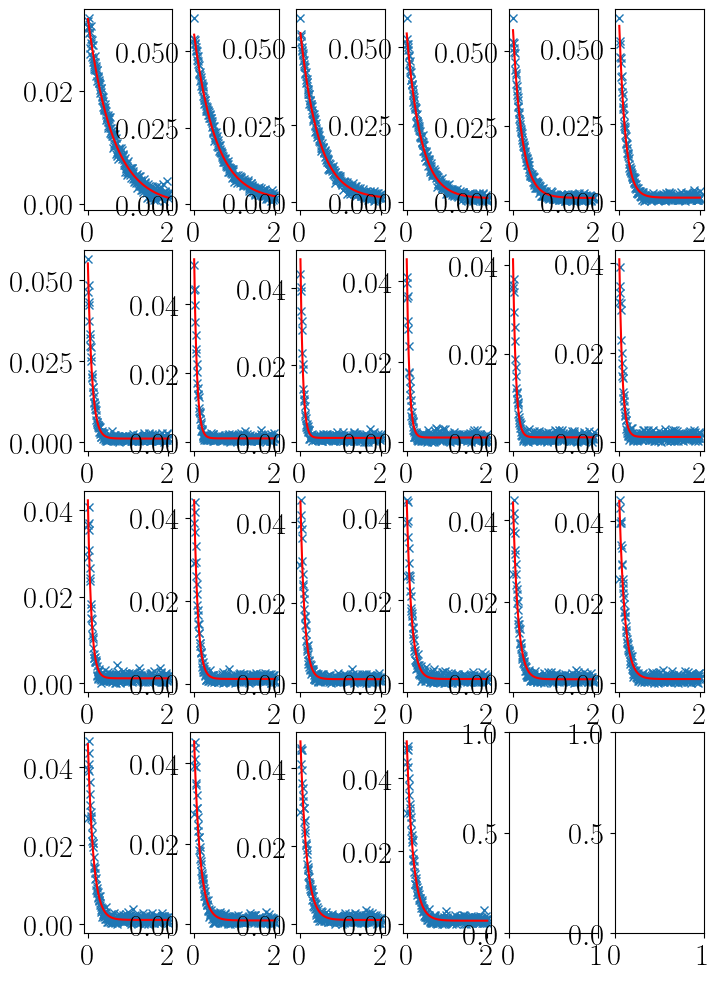

In [439]:
mag_array_m5 =[]
time_array_m5 = []
t1_m5 = np.zeros((22,))
t1_err_m5 = np.zeros((22,))
fitted_pars_array_m5 = np.zeros((22,3))
fig, axes= plt.subplots(4,6, figsize=(8,12))
axes = axes.flatten()
for j in range(22):
    entry0 = list(f[key].keys())[j]
    time = np.array(f[key][entry0]['t'])
    data = np.array(f[key][entry0]['I']) + 1j * np.array(f[key][entry0]['Q'])
    mag = abs(data) * 1e3
    mag_array_m5.append(mag)
    time_array_m5.append(time)
    tau = 0.1
    amp = abs(mag[0] - mag[-1])
    offset = 0

    p0 = [amp, tau, offset]
    fitFunction = decay
    fitted_pars, covar = scipy.optimize.curve_fit(fitFunction, time, mag,p0=p0,method='trf',xtol=1e-12,maxfev=40e3)
    axes[j].plot(time, mag, 'x')
    axes[j].plot(time, decay(time,fitted_pars[0],fitted_pars[1],fitted_pars[2]),'-',color='r')
    error = np.sqrt(abs(np.diag(covar)))
    t1_m5[j] = fitted_pars[1]
    t1_err_m5[j] = error[1]
    fitted_pars_array_m5[j,:] = fitted_pars

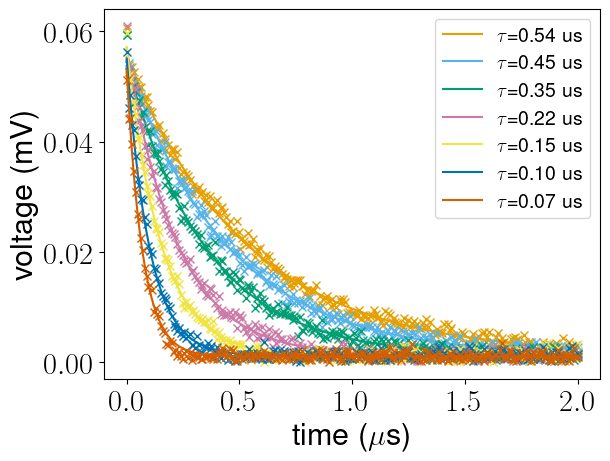

In [456]:
for i in range(1,8):
    time = time_array_m5[i]
    mag = mag_array_m5[i]
    fitted_pars = fitted_pars_array_m5[i]
    plt.plot(time, mag ,'x',color = cmap[i])
    plt.plot(time, decay(time,fitted_pars[0], fitted_pars[1], fitted_pars[2]),'-',color =cmap[i],label=r'$\tau$={%.2f} us'%(fitted_pars[1]))
plt.legend(fontsize=14)
plt.xlabel('time ('+r'$\mu$'+'s)')
plt.ylabel('voltage (mV)')
plt.savefig('G:\\Shared drives\\CavityCooling\\march_meeting_2023\\ringdown_m5_8.png')


In [449]:
max(t1_m5)/min(t1_m5)

10.112381879565374

In [462]:
y2

0.5762545262024643

Text(0.5, 0, 'drive amplitude (normalized)')

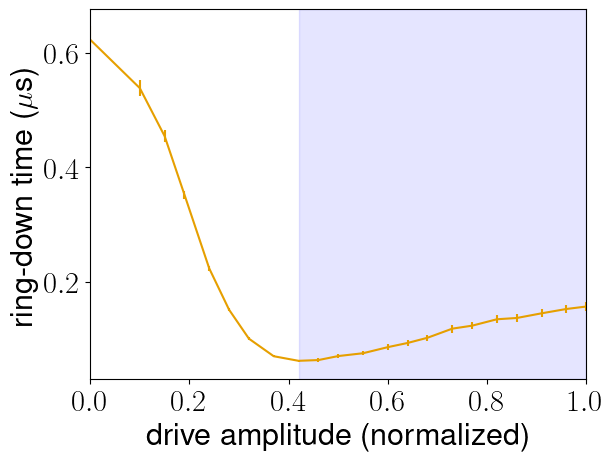

In [508]:
fig, ax = plt.subplots(1,1)
x = list(ffl_scales)
plt.errorbar([0]+list(ffl_scales),t1_m5[0:],yerr=t1_err_m5[0:]*2,color=cmap[1])

y1,y2 = ax.get_ylim()
plt.fill_between(x,y1,y2,where=x>= ffl_scales[np.argmin(t1_m5)-1],color='b', alpha=0.1)
ax.set_ylim(y1,y2)
ax.set_xlim(0,1)
plt.ylabel('ring-down time ($\mu$s)')
plt.xlabel('drive amplitude (normalized)')

In [422]:
f.close()

# Q internal

In [3]:
from fitTools.Resonator import Resonator

In [4]:
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\03\\Data_0302\\'
f_name = 'diss08_07A_FFLspec_powersweeps_14.hdf5'
fq = h5py.File(datapath + f_name,'r')

In [5]:
s21 = fq['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = fq['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = fq['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]


freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #two VNA values
preadout = np.linspace(20,50,16)

In [6]:
s21_complex_q = (s21[:,0,:]+1j*s21[:,1,:])[:,0:16]
print(np.shape(s21_complex_q))
qvals=np.zeros((16,))
qvalext=np.zeros((16,))
qierr=np.zeros((16,))
fit_is_good = np.full((16, ), False)

(800, 16)


In [8]:
len(freqs)

800

fit error = [2.93658268e+09 8.59665731e+05 6.20524631e+12]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [2.11240816e+09            nan            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
drive power = 5 dB dBm, RO atten = 24.0 dB


C:\Users\LFL\lflPython\fitTools\Resonator.py:366: RuntimeWarning: invalid value encountered in sqrt
  errors = np.sqrt(np.diagonal(cov))
C:\Users\LFL\lflPython\fitTools\Resonator.py:376: RuntimeWarning: invalid value encountered in sqrt
  Qi_err =  np.sqrt(err1+2*err2)	 # including correlations


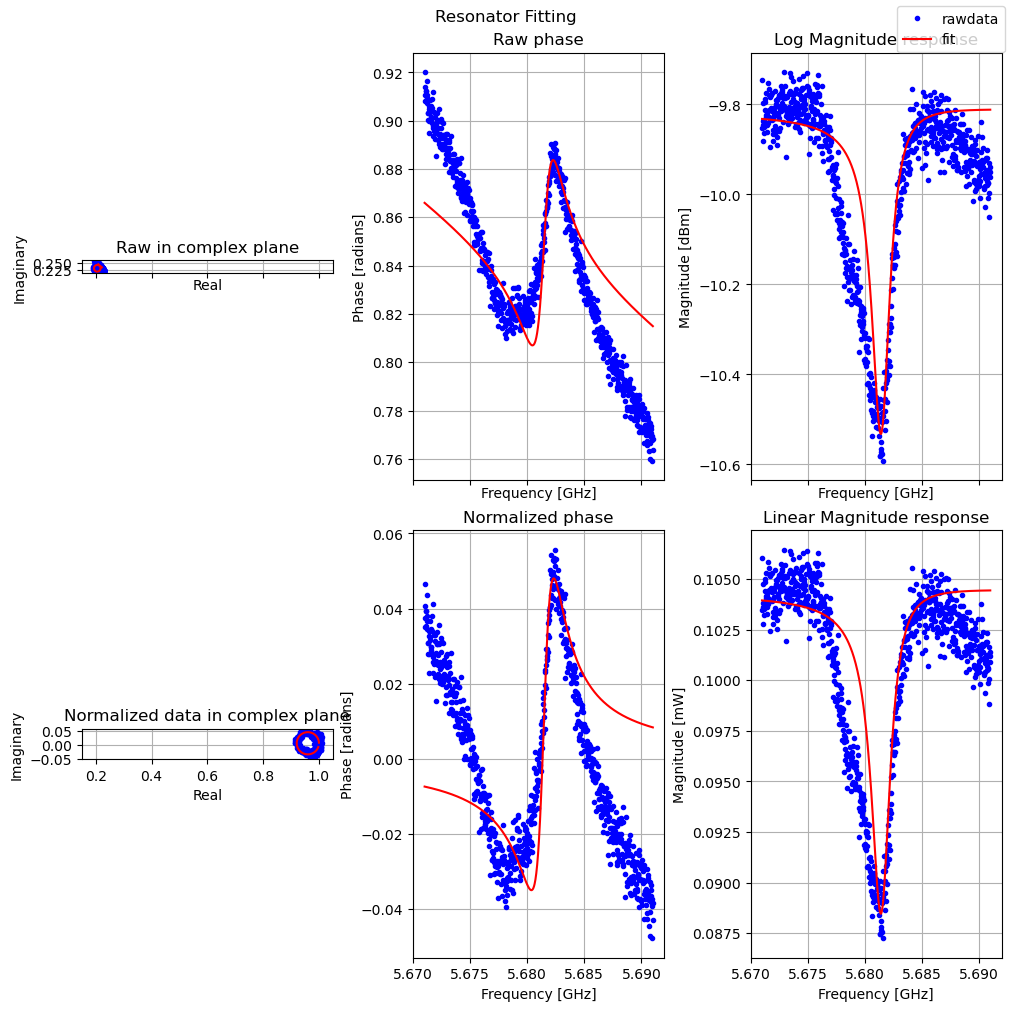

C:\Users\LFL\lflPython\fitTools\Resonator.py:366: RuntimeWarning: invalid value encountered in sqrt
  errors = np.sqrt(np.diagonal(cov))
C:\Users\LFL\lflPython\fitTools\Resonator.py:376: RuntimeWarning: invalid value encountered in sqrt
  Qi_err =  np.sqrt(err1+2*err2)	 # including correlations


fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
drive power = 5 dB dBm, RO atten = 28.0 dB


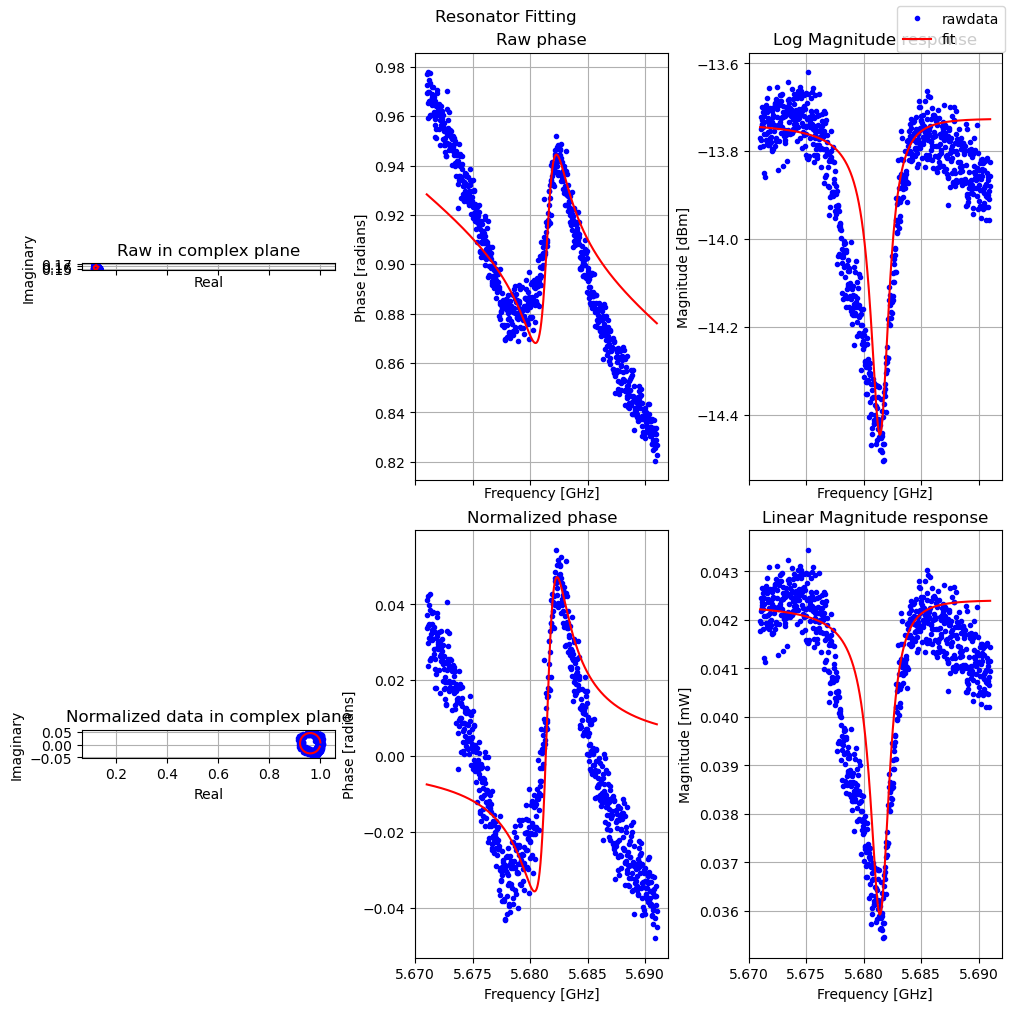

drive power = 5 dB dBm, RO atten = 30.0 dB


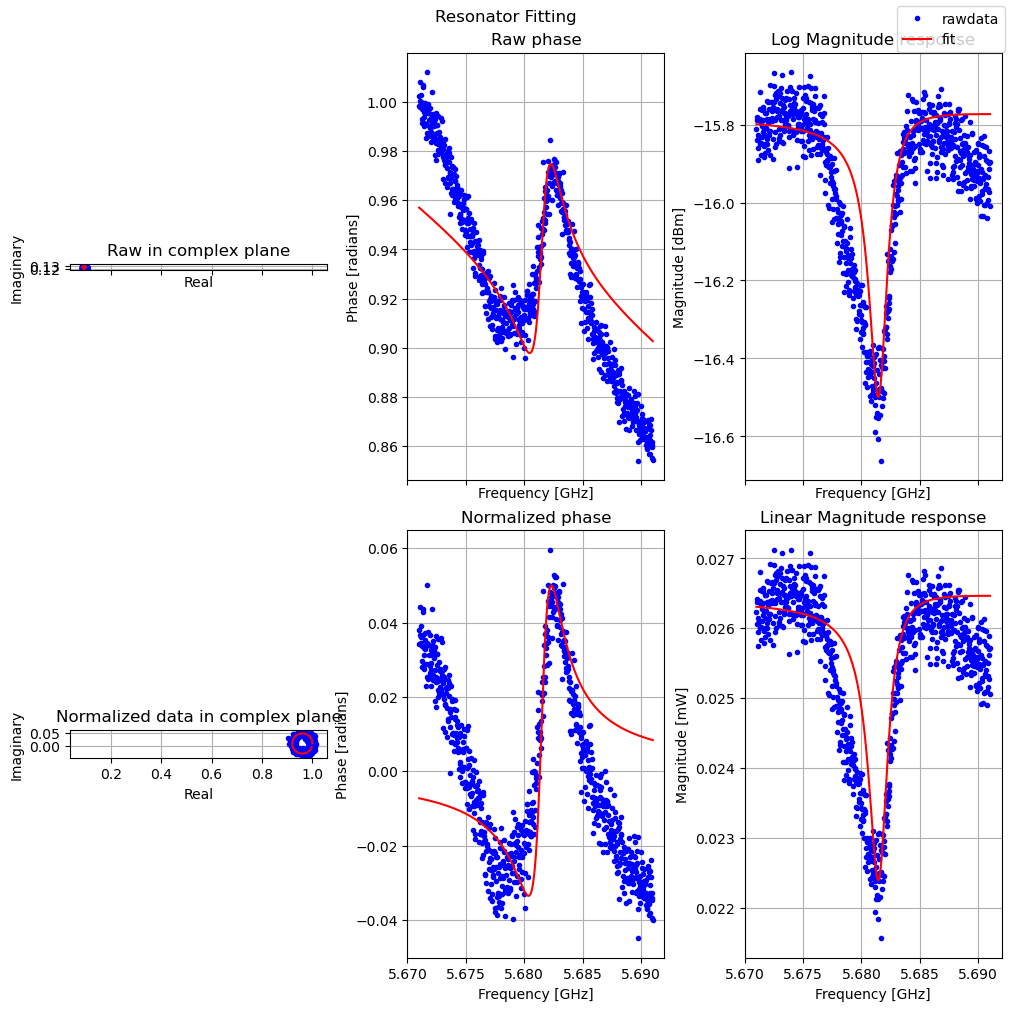

drive power = 5 dB dBm, RO atten = 32.0 dB


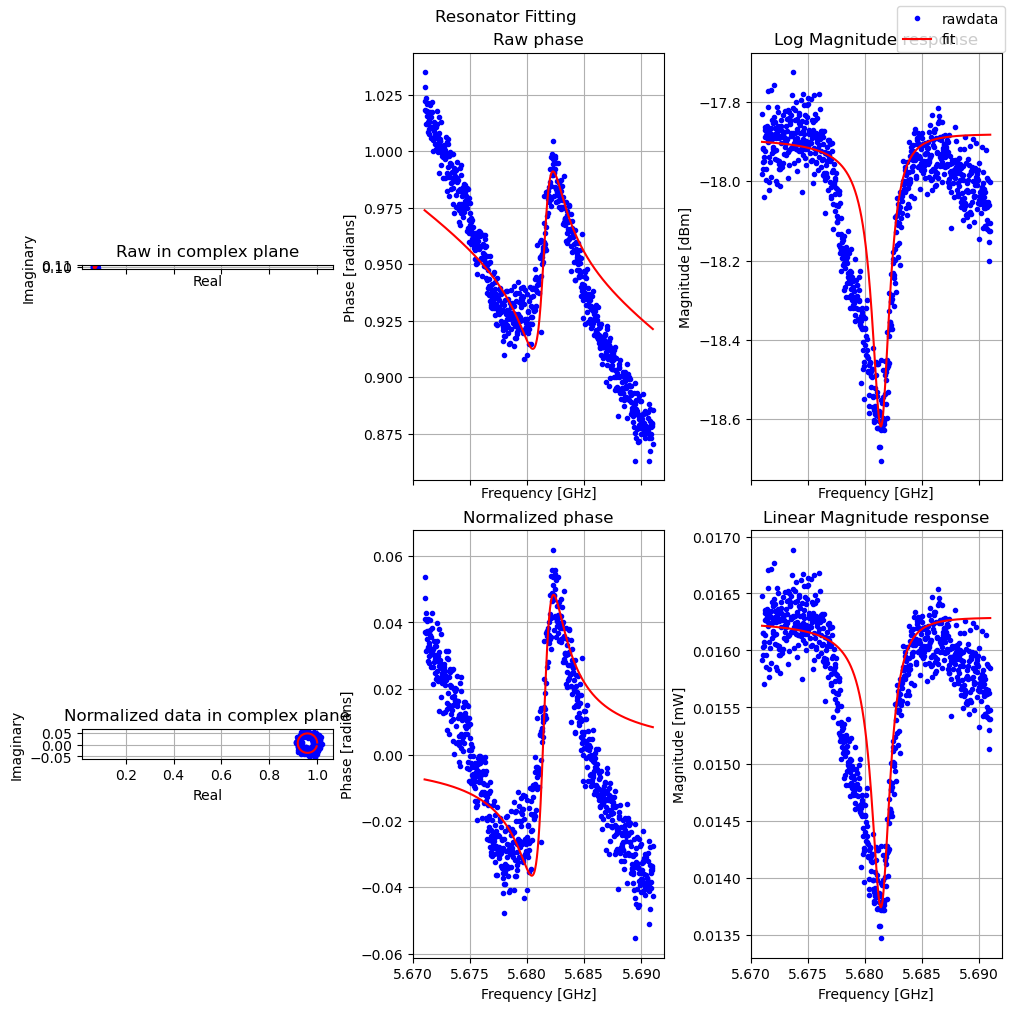

drive power = 5 dB dBm, RO atten = 34.0 dB


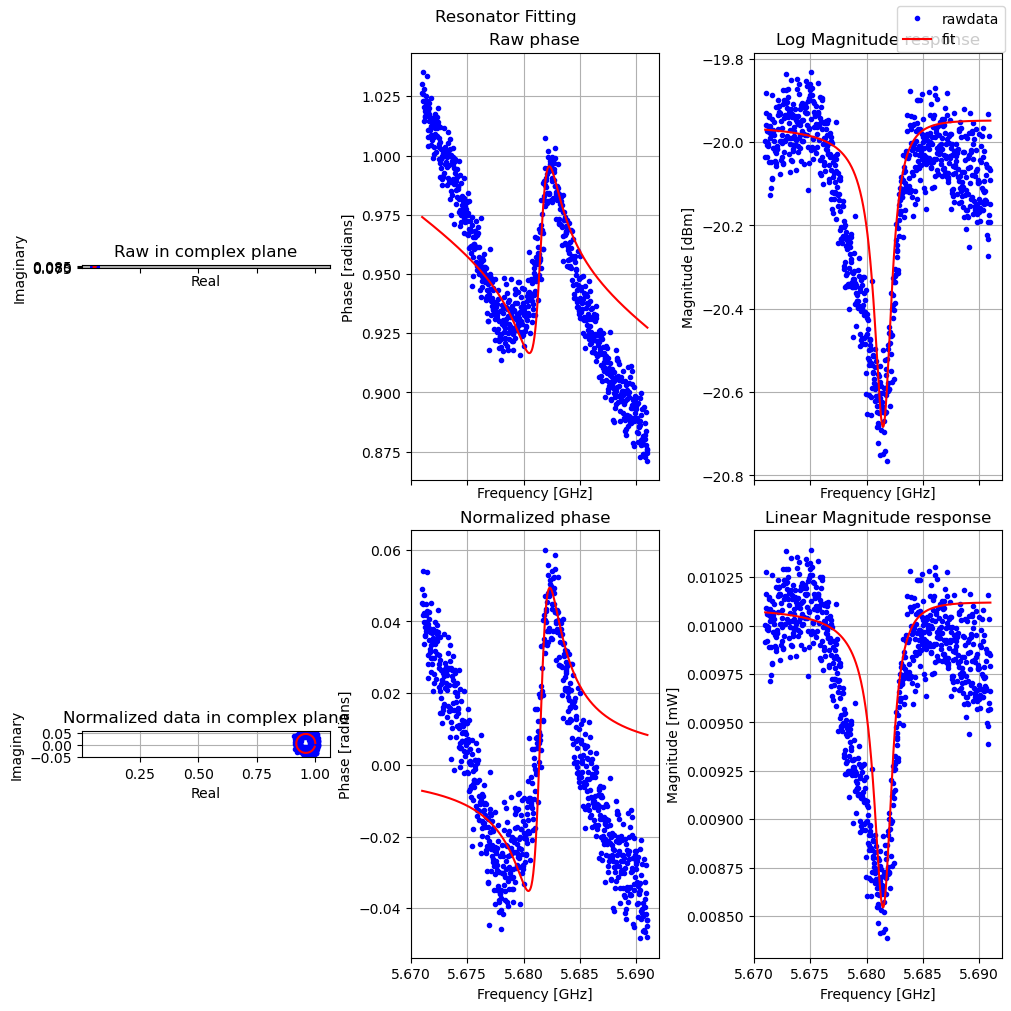

drive power = 5 dB dBm, RO atten = 36.0 dB


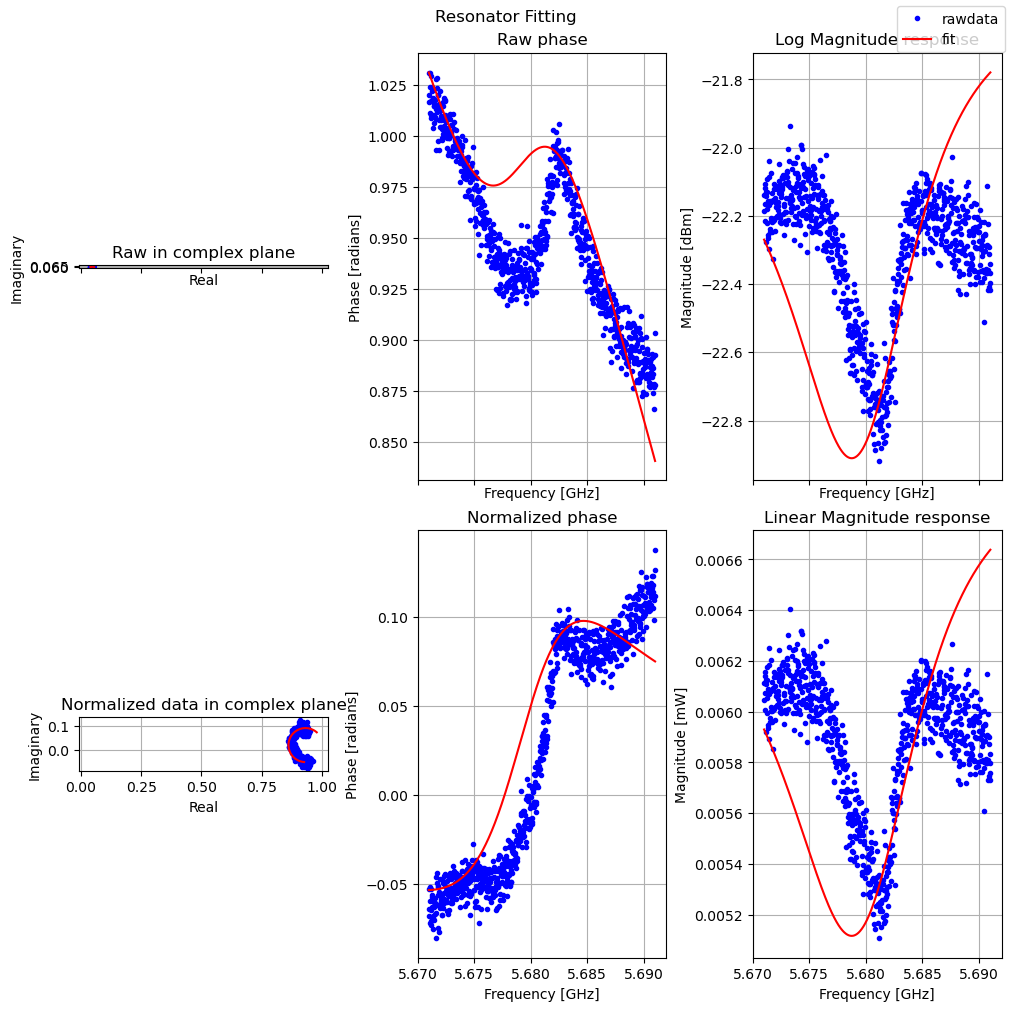

drive power = 5 dB dBm, RO atten = 38.0 dB


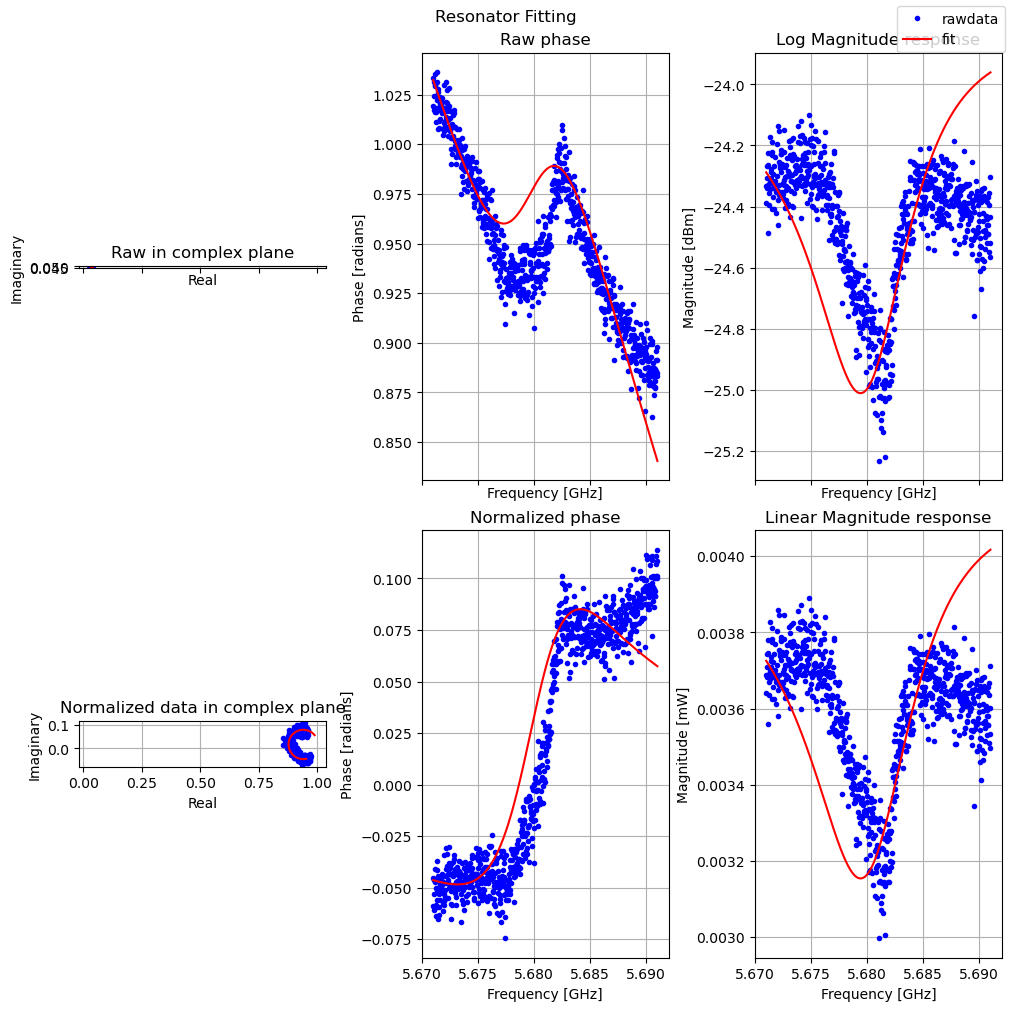

drive power = 5 dB dBm, RO atten = 40.0 dB


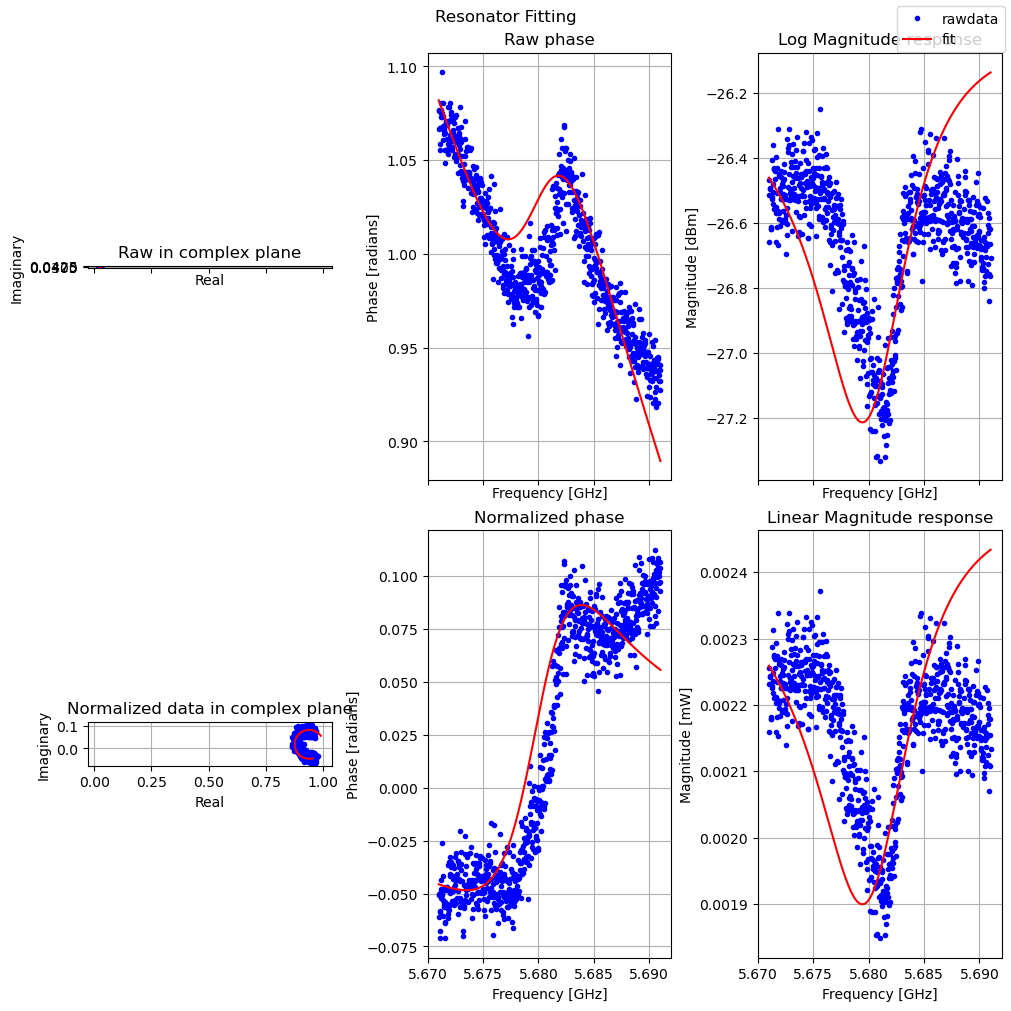

drive power = 5 dB dBm, RO atten = 42.0 dB


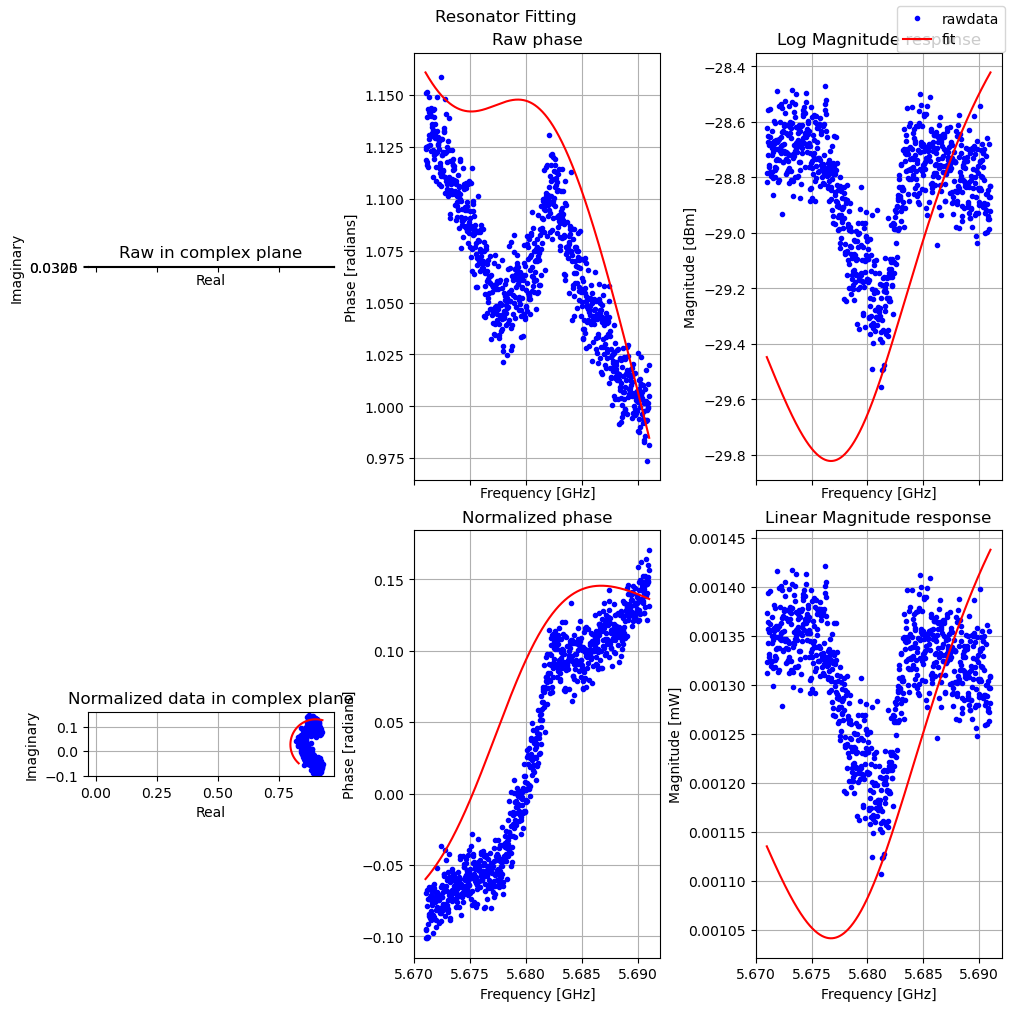

drive power = 5 dB dBm, RO atten = 44.0 dB


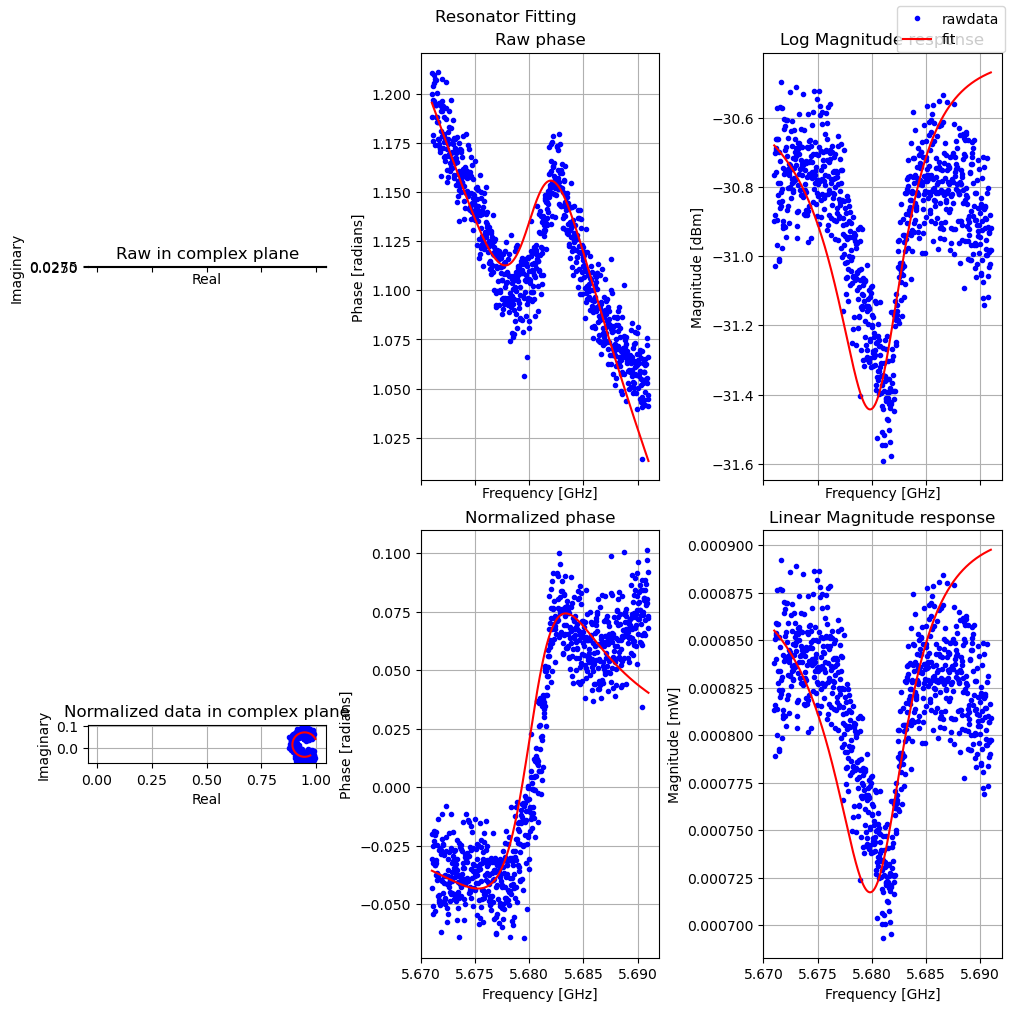

drive power = 5 dB dBm, RO atten = 46.0 dB


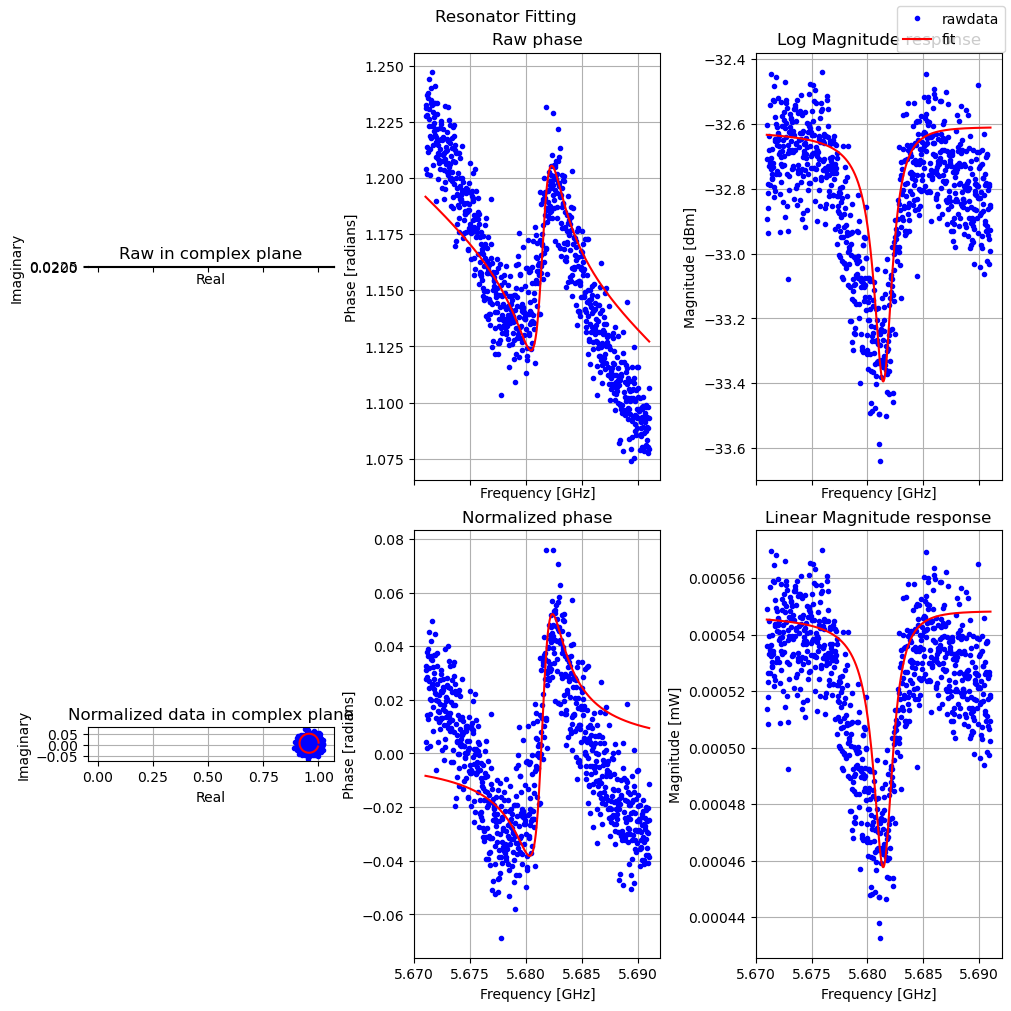

drive power = 5 dB dBm, RO atten = 48.0 dB


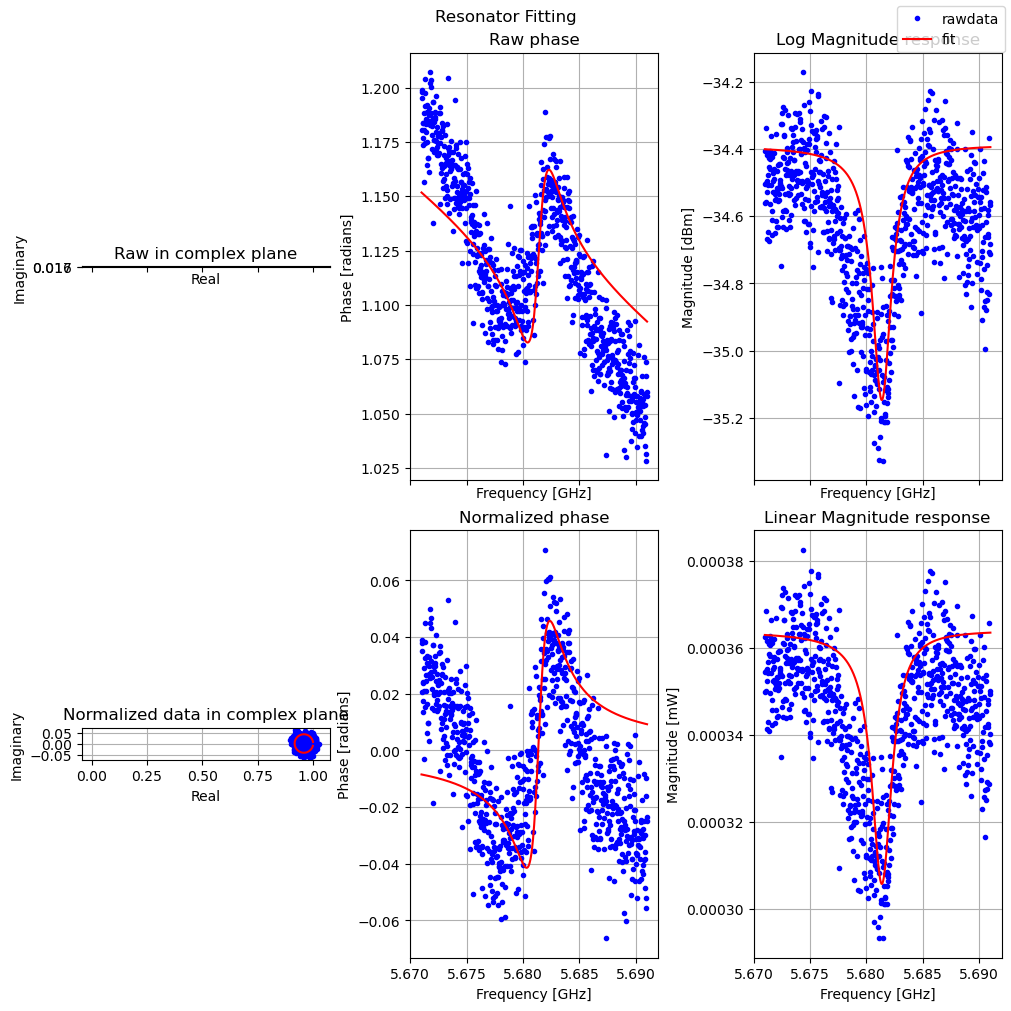

drive power = 5 dB dBm, RO atten = 50.0 dB


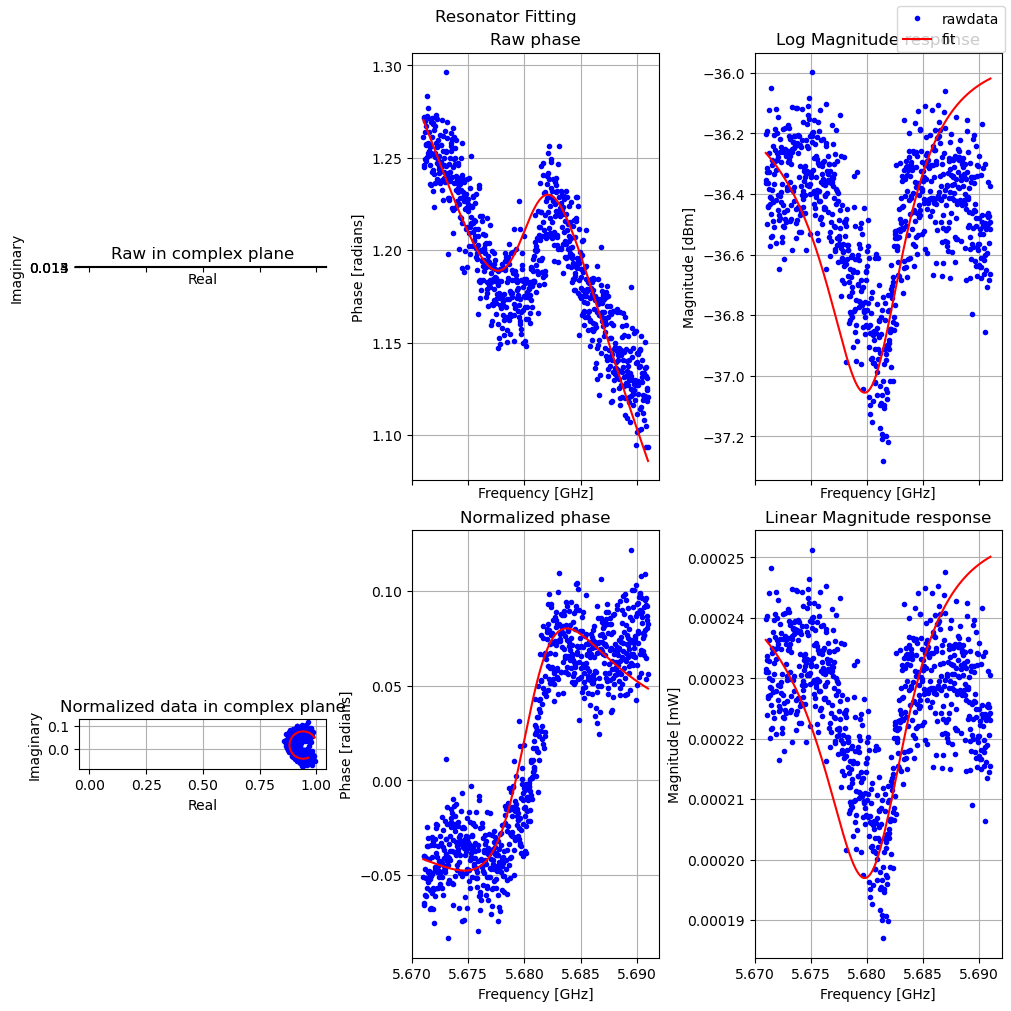

In [14]:
for i in range(16):
    # mindex=np.argmin(np.abs(s21_complex[:,i * 20 + j]))
    # res = Resonator(port_type='notch',f_data=freqs[mindex-100:mindex+40],z_data=s21_complex[mindex-100:mindex+40,i*20+j])
    res = Resonator(port_type='notch', f_data=freqs,z_data=s21_complex_q[:,i])
    res.autofit(fcrop=(5.673,5.686))
    qvals[i] = res.Qi
    qvalext[i] = res.Qc
    # qierr[i]=res.Qi_err
    if res.fit_found:
        print(f'drive power = 5 dB dBm, RO atten = {preadout[i]} dB')
        res.show()
        fit_is_good[i] = True

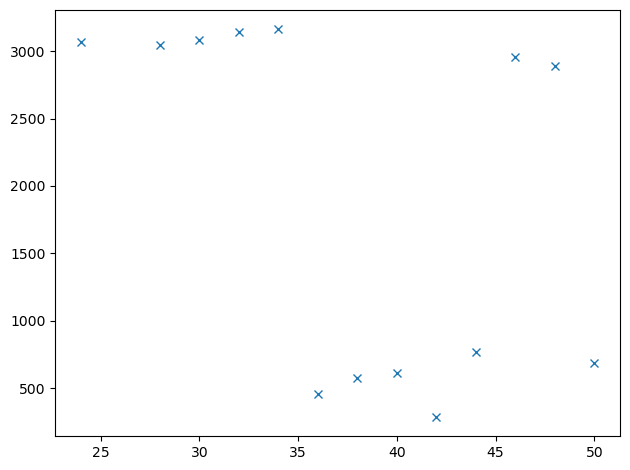

In [15]:


plt.plot(preadout, qvals,'x')
plt.tight_layout()

In [16]:
print(res)

Frequency: 5.6805 GHz
Total Q: 608
Internal Q: 688
Coupling Q: 5217
FWHM: 9.34548 MHz
Kappa: 58.71939 MHz
Single Photon Power: -123.2 dBm
Ringdown Time: 0.024 us
Impedance Mismatch -14.796 degrees
Electrical Delay: 2.186437 ns
SNR: 186695.4


# pulse sequence for ring down

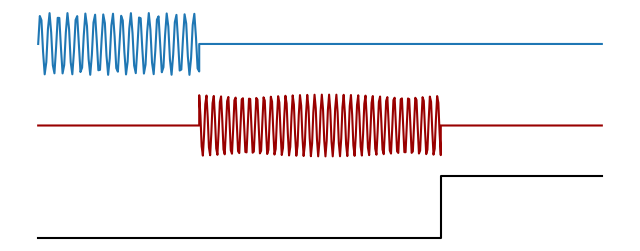

In [420]:
t0 = np.linspace(0,20,100)
t1 = np.linspace(20,50,200)
t2 = np.linspace(50,70,300)
def pulse(omega, t):
    return np.sin(omega * t)
readout = pulse(5.6, t0)
ffl = pulse(7, t1)
fig, axes = plt.subplots(3,1,figsize=(8,3), sharex=True)
axes[0].plot(np.concatenate((t0,t1,t2)), np.concatenate((readout,np.zeros((len(t1)+len(t2))))))
axes[1].plot(np.concatenate((t0,t1,t2)), np.concatenate((np.zeros((len(t0))), ffl, np.zeros((len(t2))))),color='#990000')
axes[2].plot(np.concatenate((t0,t1,t2)), np.concatenate((np.zeros((len(t0)+len(t1))),  np.ones((len(t2))))),color='black')
for ax in axes:
    ax.axis('off')

# FFL drive

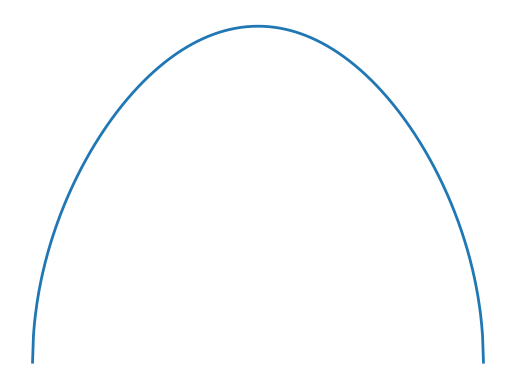

In [492]:
phis = np.linspace(-np.pi/2, np.pi/2, 500)
omega = lambda phi: 10 * np.sqrt(abs(np.cos(phi)))
plt.axis('off')
plt.plot(phis, list(map(omega,phis)),linewidth=2)